In [2]:
# Importing all the necessary libraries:

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from pathlib import Path

plt.style.use('dark_background')

In [3]:
base_path=Path.cwd().parent
csv_path=base_path/"data"/"simulated"/"metadata.csv"
print(csv_path)

c:\Users\khadk\OneDrive\Desktop\phylogenetics\data\simulated\metadata.csv


In [4]:
trees=pd.read_csv(csv_path)
trees.shape

(5000, 9)

In [5]:
trees.head()

,file_id,t1,la1,mu_over_la1,psi,la2_multiplier,n_tips,num_leaves_after_t1,num_leaves_before_t1
0,1,7.755243,0.300436,0.583149,0.718057,2.422976,261,19,242
1,6,5.408794,0.396355,0.413940,0.905547,3.557958,172,9,163
2,3,7.090530,0.980519,0.500107,0.764412,2.324149,856,396,460
3,7,7.179408,0.592200,0.063483,0.759864,3.017225,537,60,477
4,5,7.573486,0.937731,0.197977,0.651462,3.328259,623,276,347


In [6]:
trees.isnull().mean()*100

file_id                 0.0
t1                      0.0
la1                     0.0
mu_over_la1             0.0
psi                     0.0
la2_multiplier          0.0
n_tips                  0.0
num_leaves_after_t1     0.0
num_leaves_before_t1    0.0
dtype: float64

In [7]:
trees.duplicated().sum()

np.int64(0)

In [9]:
trees.describe().T

,count,mean,std,min,25%,50%,75%,max
file_id,5000.0,2499.500000,1443.520003,0.000000,1249.750000,2499.500000,3749.250000,4999.000000
t1,5000.0,6.281410,1.117145,4.003660,5.383415,6.387387,7.254692,7.998435
la1,5000.0,0.598611,0.258077,0.010650,0.400890,0.624406,0.823881,0.999658
mu_over_la1,5000.0,0.409573,0.260179,0.000096,0.180890,0.389729,0.626986,0.899899
psi,5000.0,0.670374,0.223343,0.104327,0.505784,0.703307,0.859888,0.999922
la2_multiplier,5000.0,3.430452,0.865459,2.010611,2.676439,3.387458,4.165080,4.999694
n_tips,5000.0,407.101800,236.010507,100.000000,208.000000,354.000000,567.000000,999.000000
num_leaves_after_t1,5000.0,52.877600,70.830618,6.000000,19.000000,32.000000,56.000000,859.000000
num_leaves_before_t1,5000.0,354.224200,219.882060,0.000000,174.000000,307.000000,498.250000,947.000000


In [10]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   file_id               5000 non-null   int64  
 1   t1                    5000 non-null   float64
 2   la1                   5000 non-null   float64
 3   mu_over_la1           5000 non-null   float64
 4   psi                   5000 non-null   float64
 5   la2_multiplier        5000 non-null   float64
 6   n_tips                5000 non-null   int64  
 7   num_leaves_after_t1   5000 non-null   int64  
 8   num_leaves_before_t1  5000 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 351.7 KB


In [17]:
def plot_kde(df:pd.DataFrame,cols:str):
    fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(12,8))
    axes=axes.flatten()
    for index,col in enumerate(cols):
        if index<len(axes):
            sns.kdeplot(df[col],fill=True,color='purple',ax=axes[index])
            axes[index].set_title(f'KDE of {col}')
    plt.tight_layout()
    plt.show()

In [18]:
num_cols=[col for col in trees.columns if col!='tree_id']
num_cols

['file_id',
 't1',
 'la1',
 'mu_over_la1',
 'psi',
 'la2_multiplier',
 'n_tips',
 'num_leaves_after_t1',
 'num_leaves_before_t1']

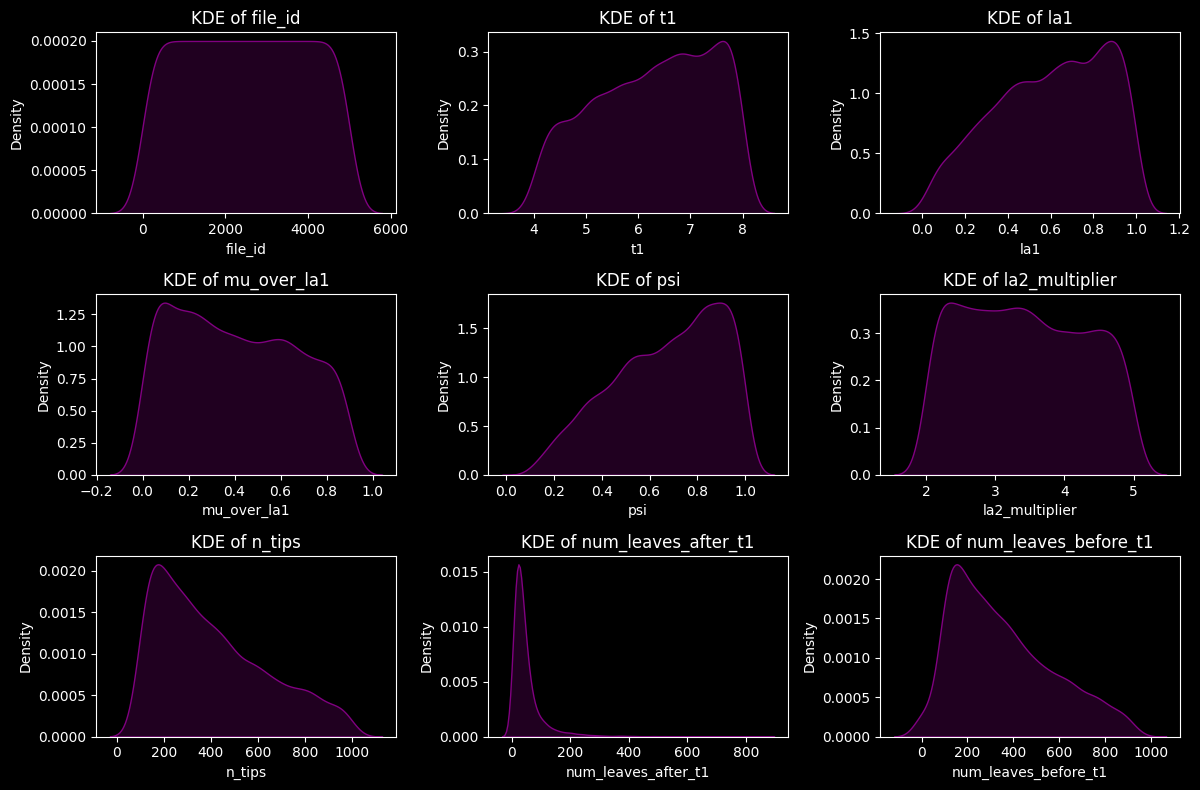

In [19]:
plot_kde(trees,num_cols)

In [20]:
trees

,file_id,t1,la1,mu_over_la1,psi,la2_multiplier,n_tips,num_leaves_after_t1,num_leaves_before_t1
0,1,7.755243,0.300436,0.583149,0.718057,2.422976,261,19,242
1,6,5.408794,0.396355,0.413940,0.905547,3.557958,172,9,163
2,3,7.090530,0.980519,0.500107,0.764412,2.324149,856,396,460
3,7,7.179408,0.592200,0.063483,0.759864,3.017225,537,60,477
4,5,7.573486,0.937731,0.197977,0.651462,3.328259,623,276,347
...,...,...,...,...,...,...,...,...,...
4995,4998,6.642604,0.379648,0.311239,0.323719,4.193331,191,13,178
4996,4999,6.873832,0.718492,0.808080,0.840514,2.753850,438,40,398
4997,4993,7.446876,0.958781,0.341301,0.786755,4.150812,760,369,391
4998,4985,5.564594,0.322140,0.885709,0.965122,3.024714,381,31,350


In [21]:
trees["numtips_timeshift_ratio"]=trees["num_leaves_after_t1"]/trees["num_leaves_before_t1"]

In [25]:
trees.sample(10)

,file_id,t1,la1,mu_over_la1,psi,la2_multiplier,n_tips,num_leaves_after_t1,num_leaves_before_t1,numtips_timeshift_ratio
4322,4317,4.262015,0.321367,0.014824,0.904559,4.760942,497,27,470,0.057447
528,533,4.572357,0.728035,0.269425,0.401208,3.504883,367,19,348,0.054598
1712,1713,5.750536,0.518920,0.641585,0.912908,3.389149,771,45,726,0.061983
312,311,6.656535,0.854999,0.586194,0.965586,3.579879,959,89,870,0.102299
0,1,7.755243,0.300436,0.583149,0.718057,2.422976,261,19,242,0.078512
1373,1376,7.998169,0.626821,0.409310,0.382566,3.591350,821,113,708,0.159605
2848,2854,7.358874,0.238027,0.173765,0.871463,3.027957,891,54,837,0.064516
935,941,6.899770,0.381239,0.899598,0.859846,3.073470,713,39,674,0.057864
1732,1732,5.540342,0.481961,0.284395,0.690201,4.828368,591,30,561,0.053476
4357,4361,6.304149,0.566873,0.050865,0.747693,2.696322,822,42,780,0.053846
